In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df = df.drop('CUST_ID',axis=1)

In [5]:
df.shape

(8950, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df = df.dropna()
df.shape

(8636, 17)

In [8]:
df['TOTAL_PAYMENT_PERFORMANCE'] = df['PAYMENTS'] / df['BALANCE']

df['USAGE_RATE'] = df['PURCHASES'] / df['CREDIT_LIMIT']

df['AVG_PAYMENT '] = df['PAYMENTS'] / df['TENURE']

df['ACTIVE_PURCHASER'] = df['PURCHASES_FREQUENCY'].apply(lambda x: 1 if x > 0.5 else 0)

In [9]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PAYMENT_PERFORMANCE,USAGE_RATE,AVG_PAYMENT,ACTIVE_PURCHASER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,...,2,1000.0,201.802084,139.509787,0.000000,12,4.933946,0.095400,16.816840,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,...,0,7000.0,4103.032597,1072.340217,0.222222,12,1.281210,0.000000,341.919383,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,...,12,7500.0,622.066742,627.284787,0.000000,12,0.249310,0.103089,51.838895,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,...,1,1200.0,678.334763,244.791237,0.000000,12,0.829550,0.013333,56.527897,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,...,8,1800.0,1400.057770,2407.246035,0.000000,12,0.773586,0.740711,116.671481,1


<Figure size 800x550 with 0 Axes>

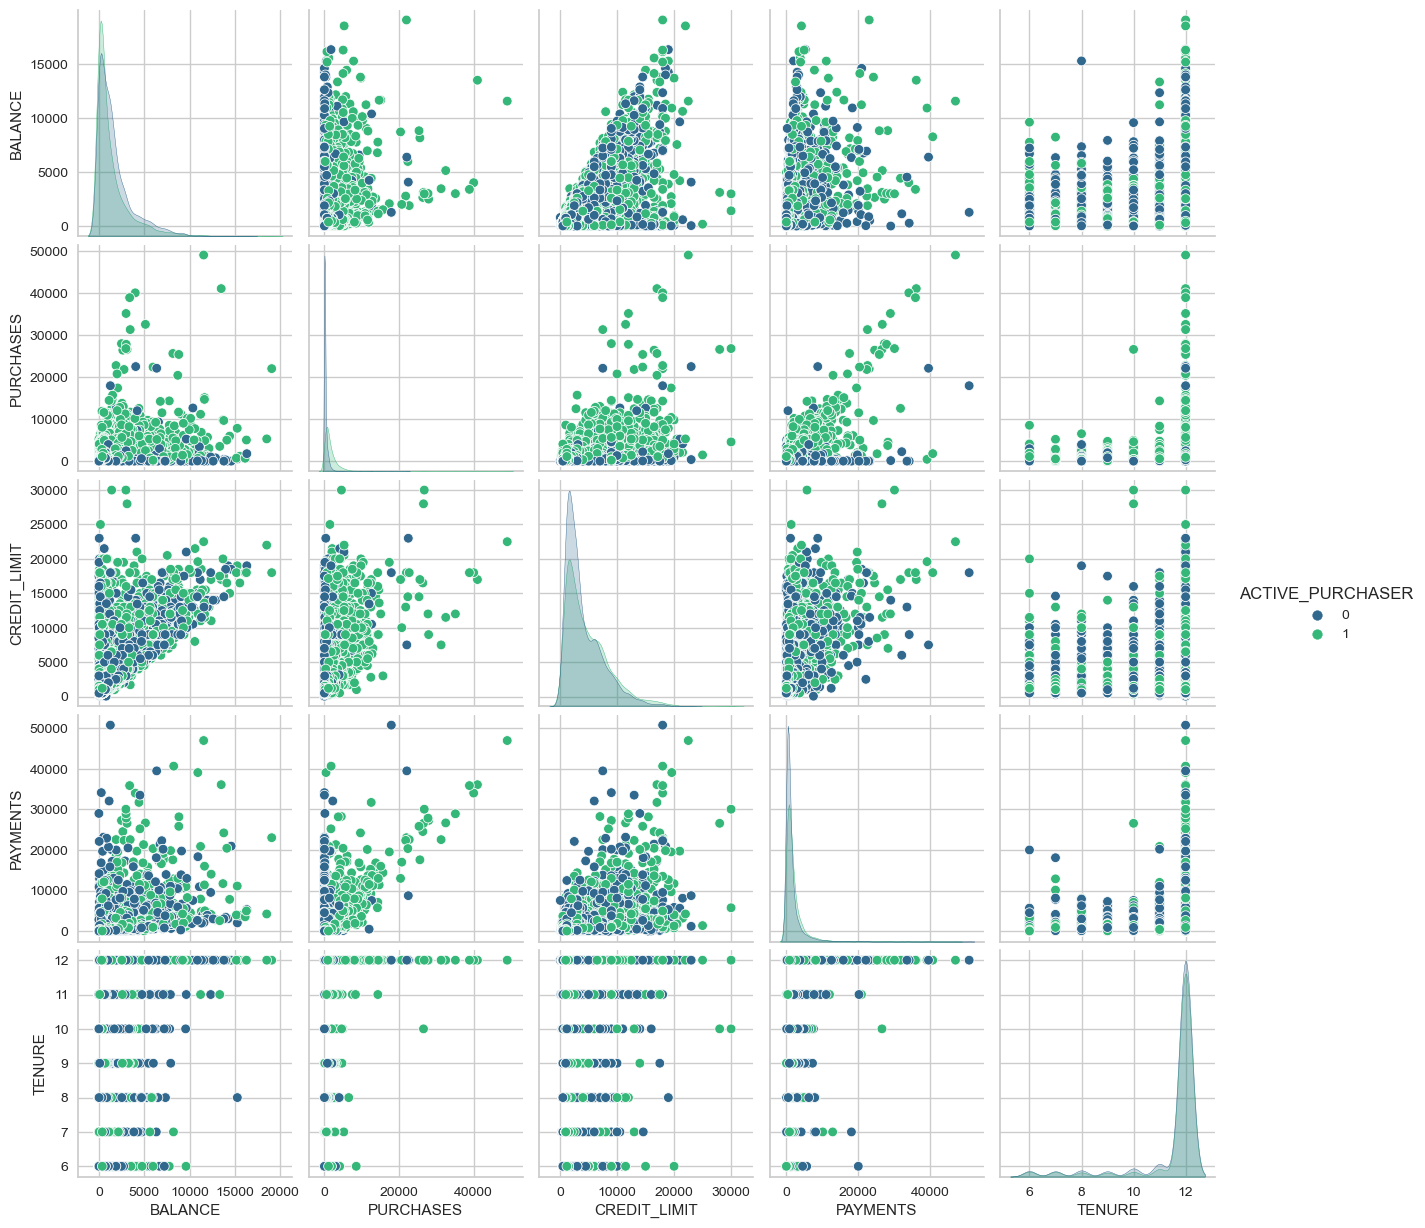

In [10]:
cmap = colors.ListedColormap(['#440154', '#3b528b', '#5ec962', '#fde725','#21918c'])
palette = ['#440154', '#3b528b', '#5ec962', '#fde725','#21918c']

To_Plot = ["BALANCE", "PURCHASES", "CREDIT_LIMIT", "PAYMENTS", "TENURE","ACTIVE_PURCHASER"]

plt.figure()
sns.pairplot(df[To_Plot],hue='ACTIVE_PURCHASER', palette='viridis')
plt.show()

In [11]:
df = df[(df['PURCHASES'] < 30000)]
df.shape

(8629, 21)

In [12]:
cols_del = ['ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
df = df.drop(cols_del, axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,TOTAL_PAYMENT_PERFORMANCE,USAGE_RATE,AVG_PAYMENT,ACTIVE_PURCHASER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0,2,1000.0,201.802084,139.509787,12,4.933946,0.095400,16.816840,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,4,0,7000.0,4103.032597,1072.340217,12,1.281210,0.000000,341.919383,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0,12,7500.0,622.066742,627.284787,12,0.249310,0.103089,51.838895,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0,1,1200.0,678.334763,244.791237,12,0.829550,0.013333,56.527897,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0,8,1800.0,1400.057770,2407.246035,12,0.773586,0.740711,116.671481,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0,1,500.0,58.644883,43.473717,6,9.987697,0.041800,9.774147,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0,6,1000.0,325.594462,48.886365,6,11.426966,0.291120,54.265744,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0,5,1000.0,81.270775,82.418369,6,3.473307,0.144400,13.545129,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,2,0,500.0,52.549959,55.755628,6,3.904864,0.000000,8.758327,0


In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

In [14]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(columns = df.columns, data = scaler.transform(df))
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,TOTAL_PAYMENT_PERFORMANCE,USAGE_RATE,AVG_PAYMENT,ACTIVE_PURCHASER
0,-0.745562,-0.374821,-0.477726,-0.407631,-0.361080,-0.469051,-0.819949,-0.479861,-0.526508,-0.963850,-0.563427,-0.305377,0.355482,-0.014706,-0.389938,-0.567021,-0.941300
1,0.767723,0.065472,-0.528366,-0.407631,-0.468652,2.566345,-1.235387,0.098494,-0.608185,0.681716,0.847859,0.088483,0.355482,-0.014988,-0.608425,0.804336,-0.941300
2,0.429165,0.505766,-0.117952,0.135702,-0.468652,-0.469051,1.257237,-0.479861,-0.118125,0.818846,-0.411395,-0.099428,0.355482,-0.015067,-0.372328,-0.419290,1.062361
3,-0.373740,0.505766,-0.519873,-0.396387,-0.468652,-0.469051,-1.027669,-0.479861,-0.567347,-0.908998,-0.391040,-0.260925,0.355482,-0.015022,-0.577889,-0.399511,-0.941300
4,0.101136,0.505766,0.179365,-0.407631,1.034734,-0.469051,0.426363,-0.479861,-0.281478,-0.744442,-0.129953,0.652107,0.355482,-0.015027,1.087964,-0.145811,1.062361


In [15]:
pca = PCA(n_components=2)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(data = pca.transform(scaled_df),columns = (['col1','col2']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8623.0,-3.955242e-17,2.217114,-3.067457,-1.492511,-0.487787,0.711069,22.820339
col2,8623.0,9.888105e-17,1.769651,-5.471081,-1.297202,-0.268059,0.685270,26.921531


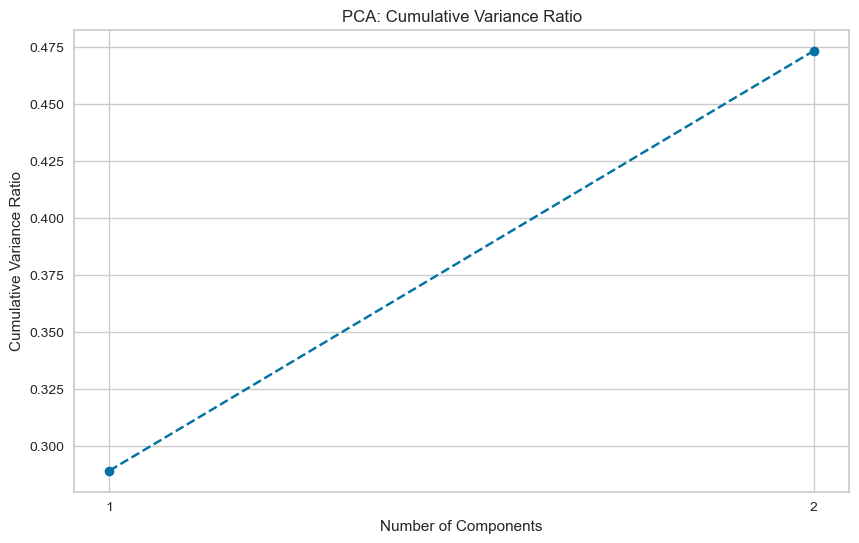

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('PCA: Cumulative Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.xticks(np.arange(1, len(cumulative_variance_ratio) + 1, 1))
plt.grid(True)
plt.show()

In [17]:
x = PCA_ds['col1']
y = PCA_ds['col2']

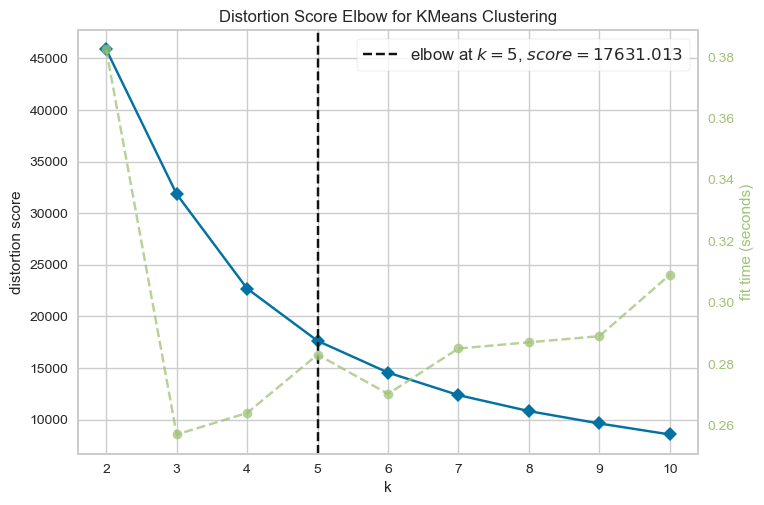

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [19]:
AC = AgglomerativeClustering(n_clusters=5)

yhat_AC = AC.fit_predict(PCA_ds)

PCA_ds["Clusters"] = yhat_AC

df["Clusters"]= yhat_AC

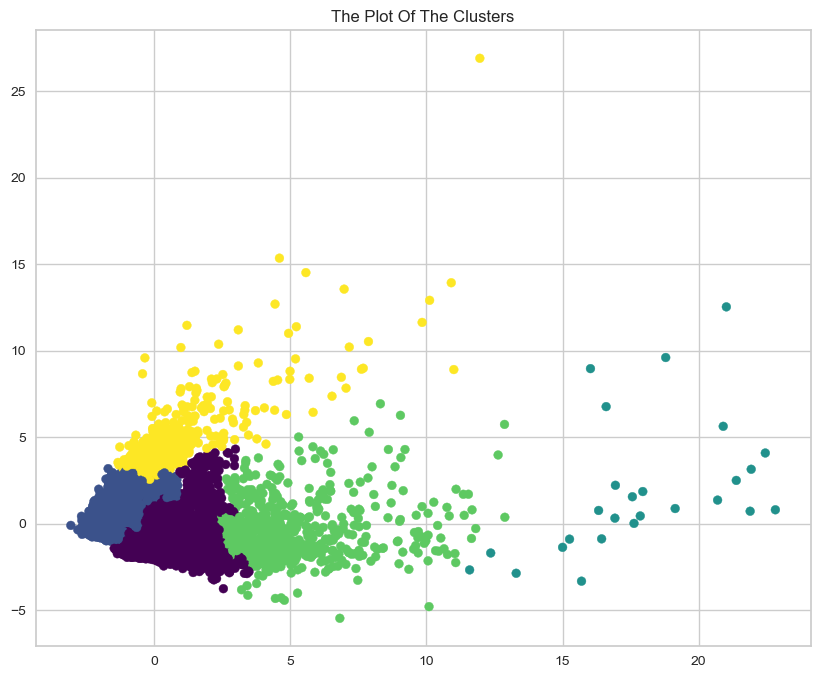

In [20]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

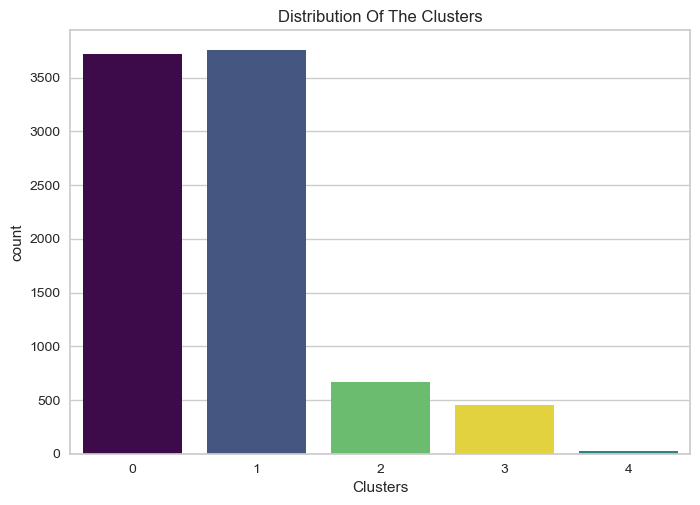

In [21]:
pl = sns.countplot(x=df["Clusters"], palette= palette)
pl.set_title("Distribution Of The Clusters")
plt.show()

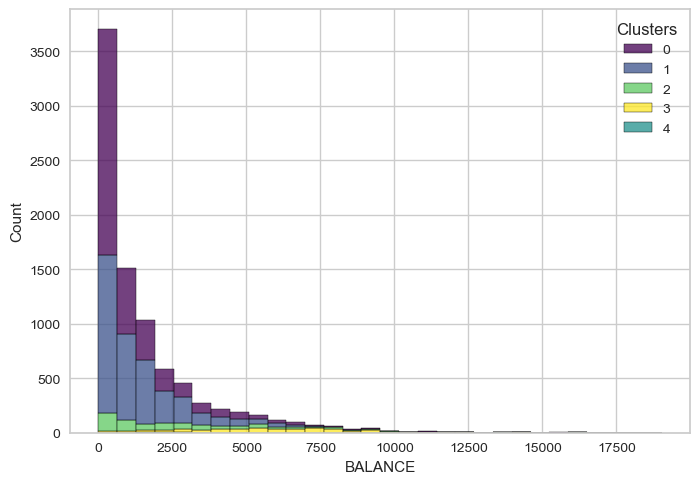

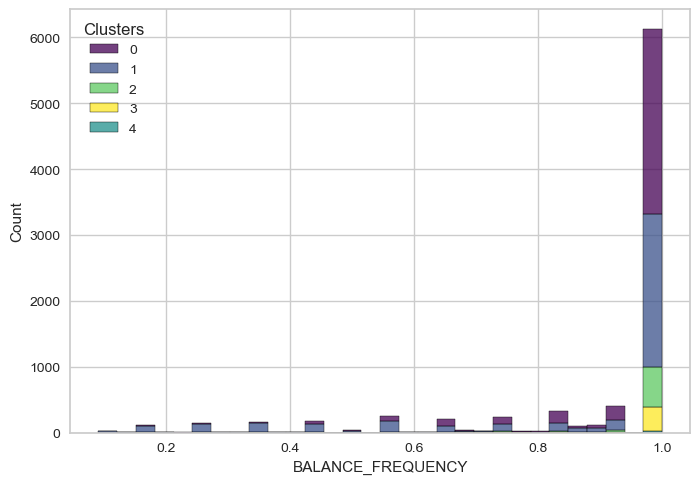

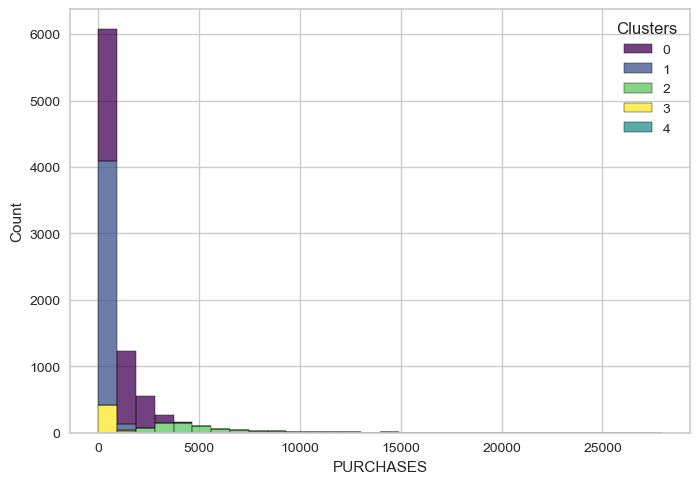

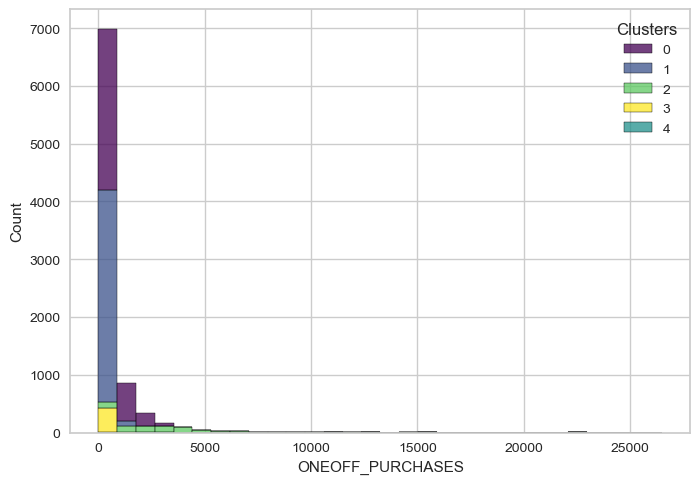

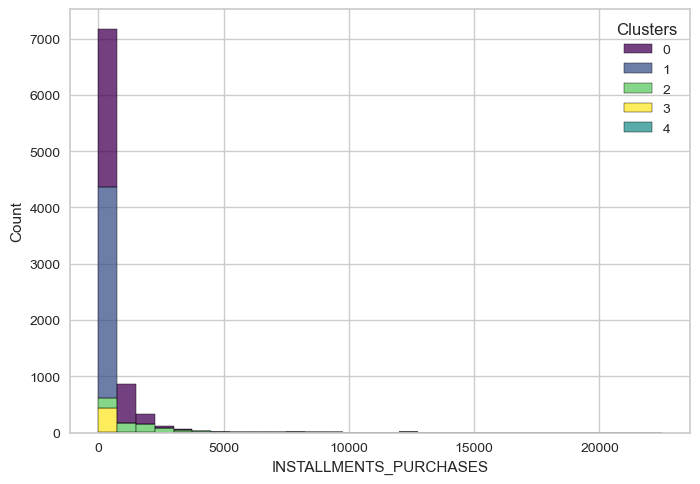

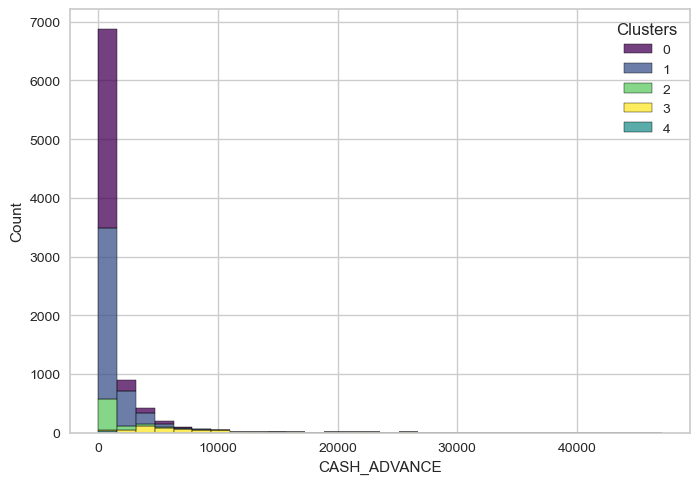

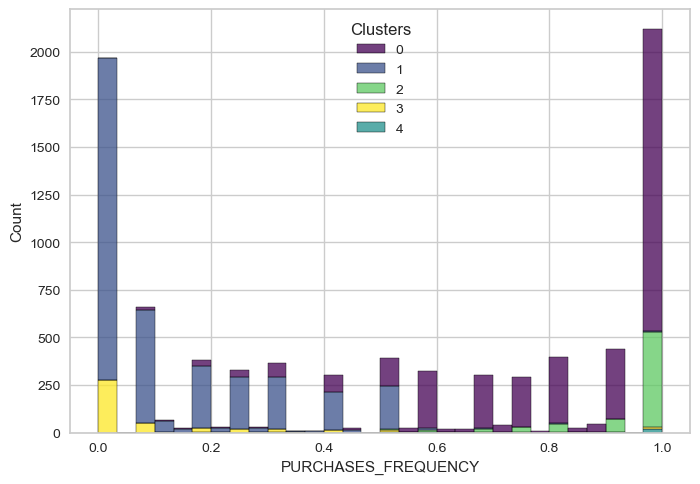

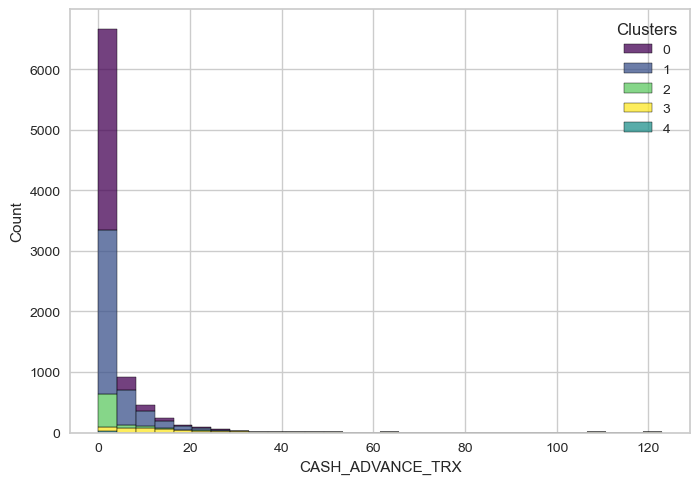

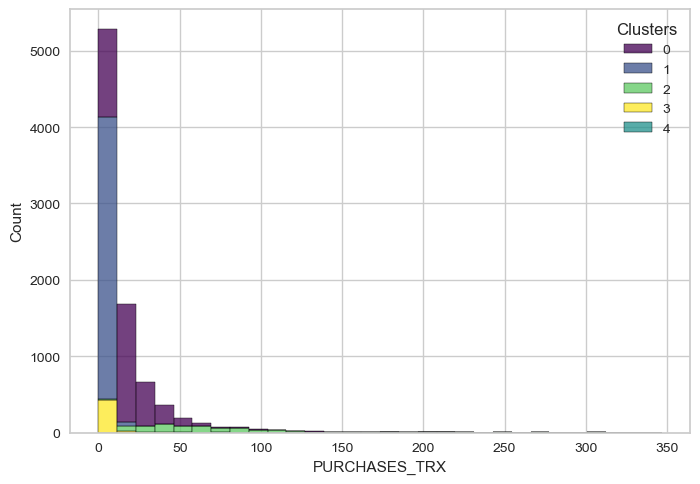

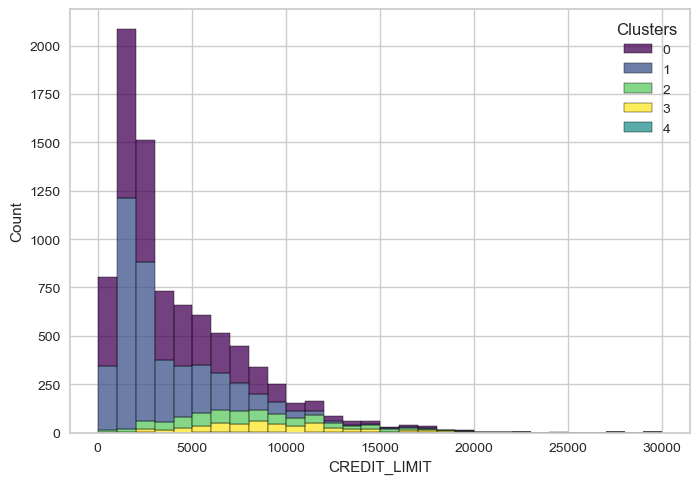

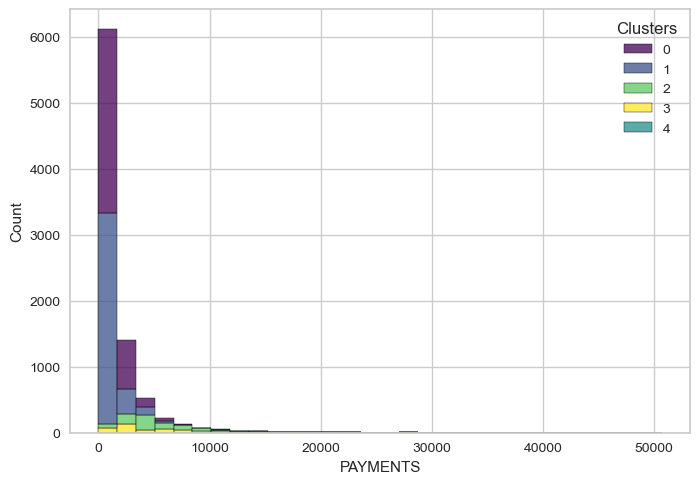

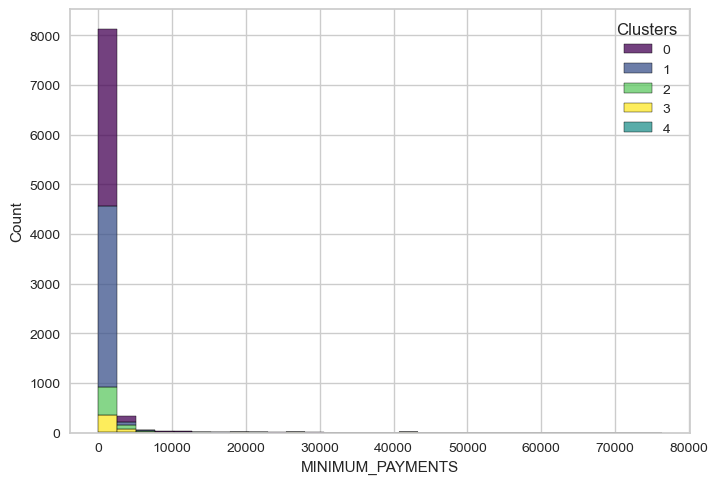

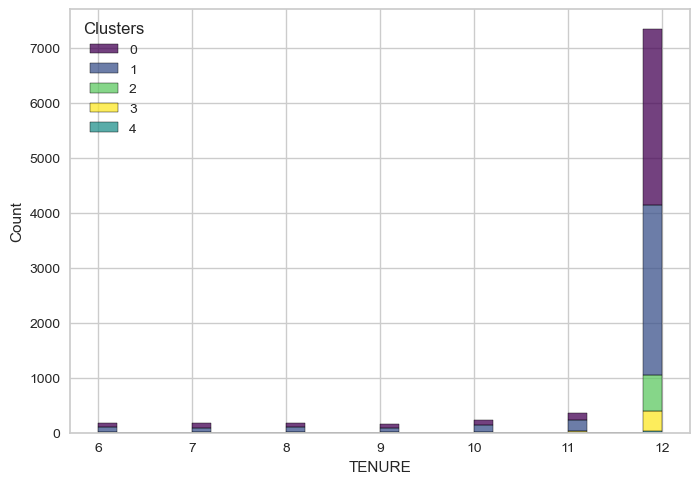

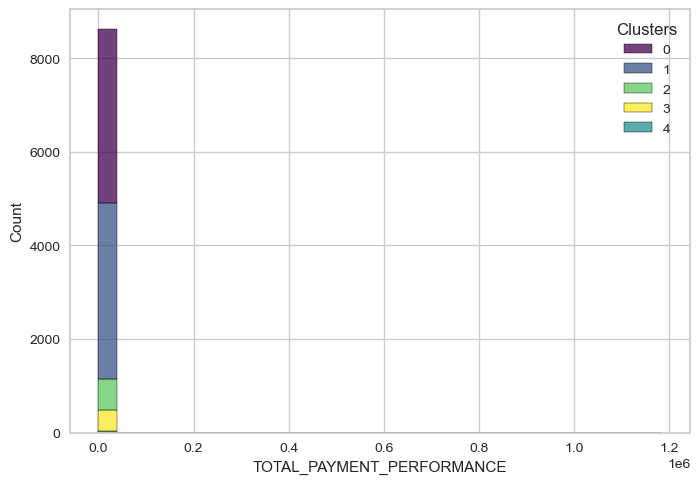

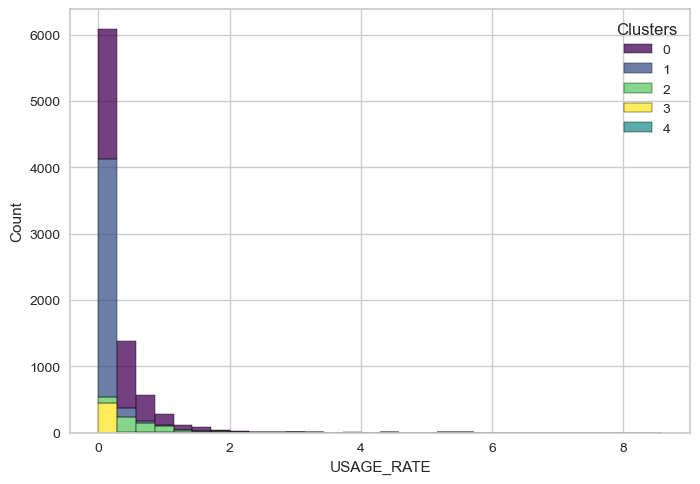

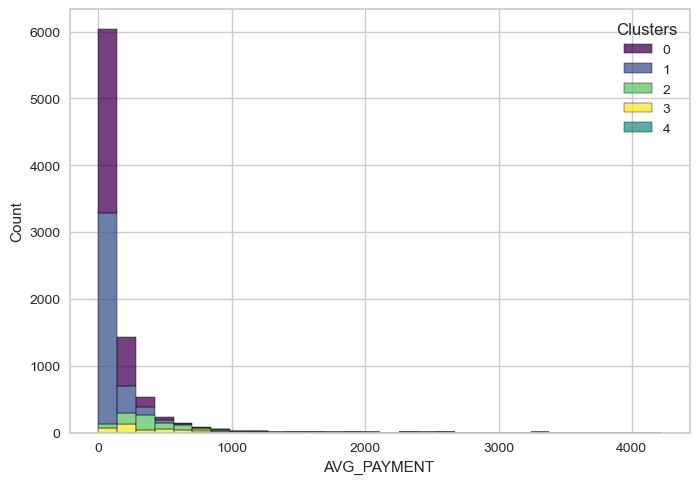

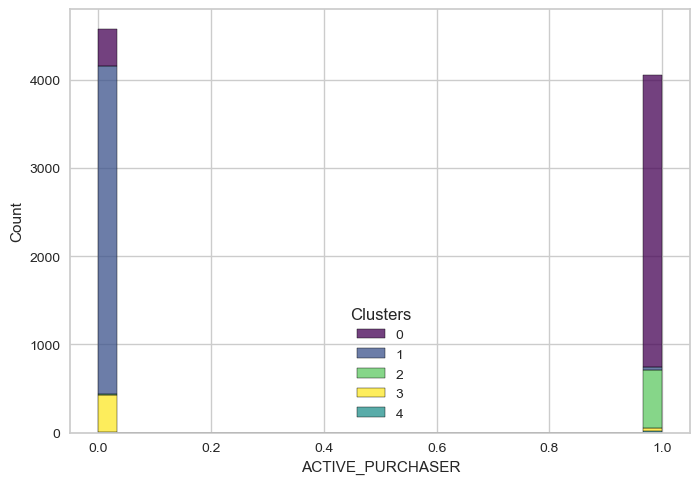

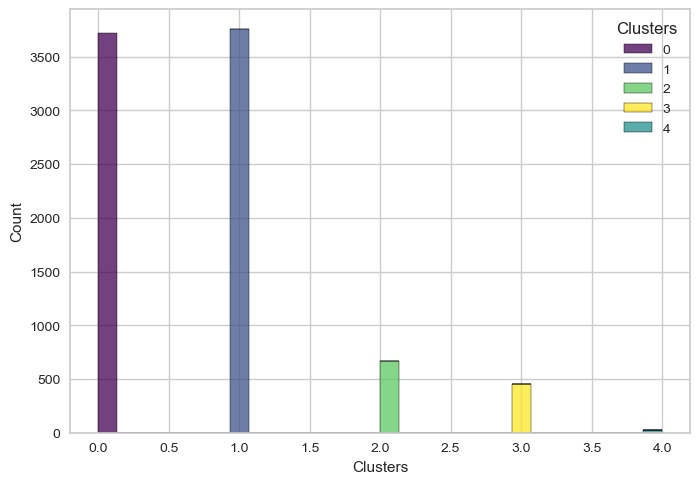

In [22]:
for i in df.columns:
    sns.histplot(data=df, x=df[i], hue='Clusters', palette=palette, multiple='stack', bins=30)
    plt.show()

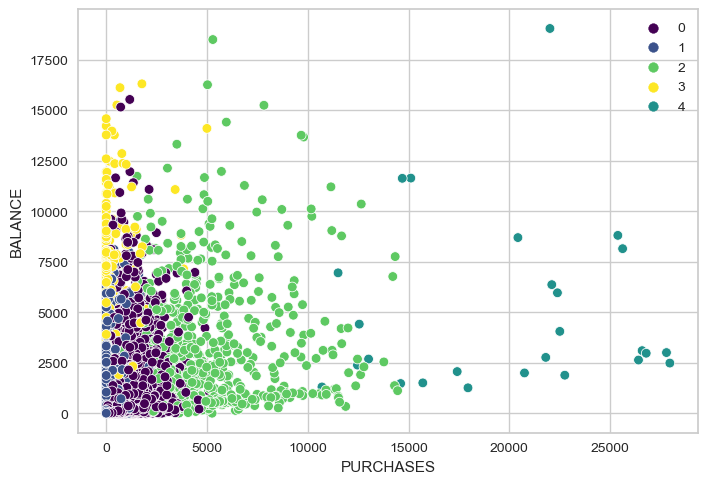

In [23]:
pl = sns.scatterplot(data = df,x=df["PURCHASES"], y=df["BALANCE"],hue=df["Clusters"], palette=palette)
plt.legend()
plt.show()

<Figure size 800x550 with 0 Axes>

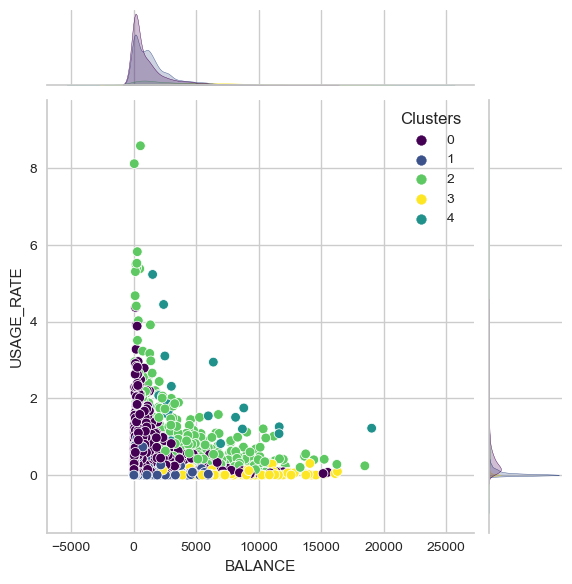

<Figure size 800x550 with 0 Axes>

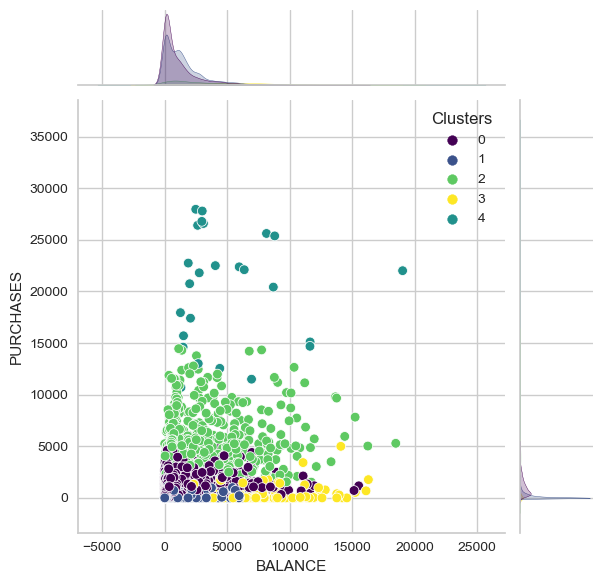

<Figure size 800x550 with 0 Axes>

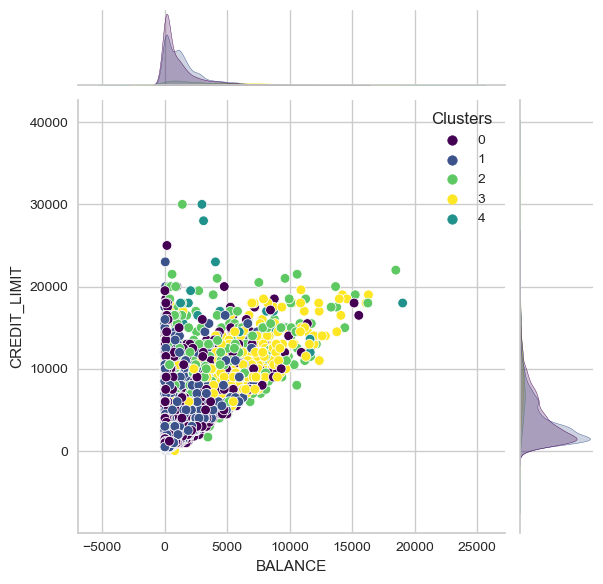

<Figure size 800x550 with 0 Axes>

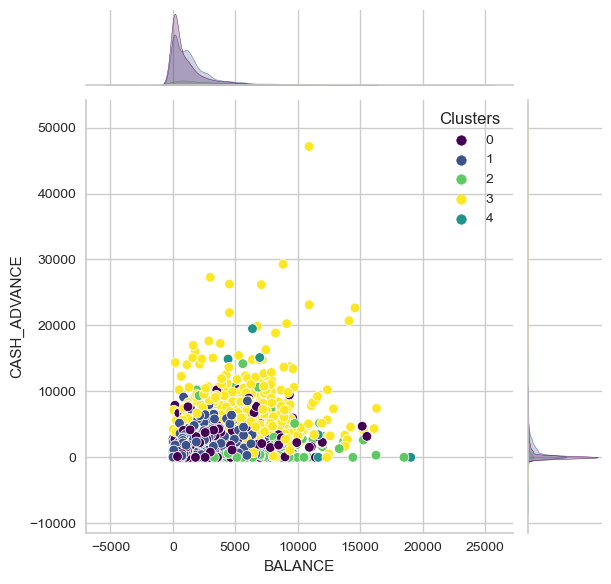

In [24]:
Places =["USAGE_RATE", "PURCHASES",  "CREDIT_LIMIT","CASH_ADVANCE"]

for i in Places:
    plt.figure()
    sns.jointplot(x=df["BALANCE"],y = df[i],hue=df["Clusters"], palette=palette)
    plt.show()

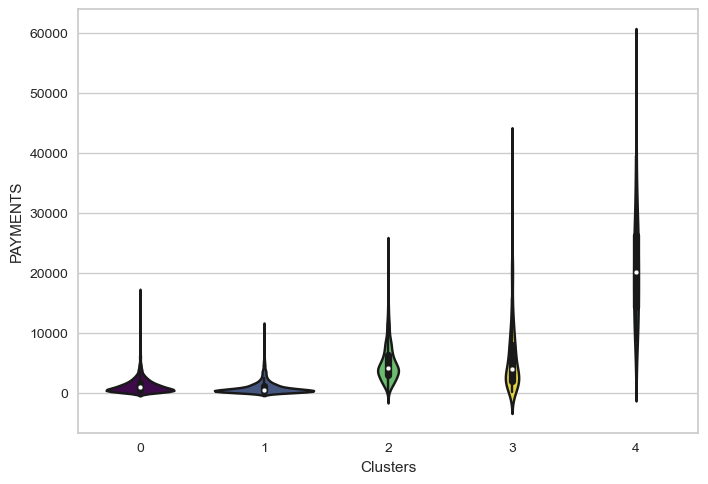

In [25]:
sns.violinplot(data=df, x='Clusters', y='PAYMENTS', palette=palette)
plt.show()